In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from uncertainties import ufloat, unumpy
from scipy.signal import find_peaks

def oscillator(t, A, B, omega_plus, omega_minus, phi, d, C):
    return A*np.cos(omega_plus*(t-d)+phi) + B*np.cos(omega_minus*(t-d)+phi) + C

filenames = []
for i in range(1, 51):
    filename = "/home/ws10/maitrey/p442-integrated-lab/IV. Coupled Oscillator/DKMM/ALL{:04d}".format(i) + ".CSV"
    filenames.append(filename)


for i, file1 in enumerate(filenames):
    data = np.genfromtxt(file1, skip_header=18, delimiter=',')
    data[:, 0] = data[:, 0] - data[:, 0][0]
    data[:, 1] = data[:, 1] / np.max(data[:, 1])
    data[:, 2] = data[:, 2] - data[:, 2][0]
    data[:, 3] = data[:, 3] / np.max(data[:, 3])
    np.savetxt('DLL{:04d}'.format(i+1) + '.CSV', data, delimiter=',')


# filename = '/home/ws10/maitrey/p442-integrated-lab/IV. Coupled Oscillator/DKMM/ALL0050.CSV'
# data = np.genfromtxt(filename, skip_header=18, delimiter=',')


# # t1 = data[:, 0] # first wave
# data[:, 0] = data[:, 0] - data[:, 0][0]
# # y1 = data[:, 1] # first wave
# data[:, 1] = data[:, 1] / np.max(data[:, 1])
# # t2 = data[:, 2] # second wave
# data[:, 2] = data[:, 2] - data[:, 2][0]
# # y2 = data[:, 3] # second wave
# data[:, 3] = data[:, 3] / np.max(data[:, 3])

[ 6.02832851e-01  2.49472640e-01  7.12286778e+01  8.33260685e+01
  3.16989030e+02 -1.03993326e-01  8.62407749e-02]
[0.6028328505761817+/-0.0008766872438814897, 0.24947263953669144+/-0.0008756776010593886, 71.22867776252346+/-0.0025066616016685903, 83.32606845641814+/-0.006094205937276608, 316.989029532129+/-0.04746256212381065, -0.10399332560862665+/-0.0006526268653386184, 0.08624077494866184+/-0.0006155370800141696]
5.283+/-0.013 0.5637+/-0.0010


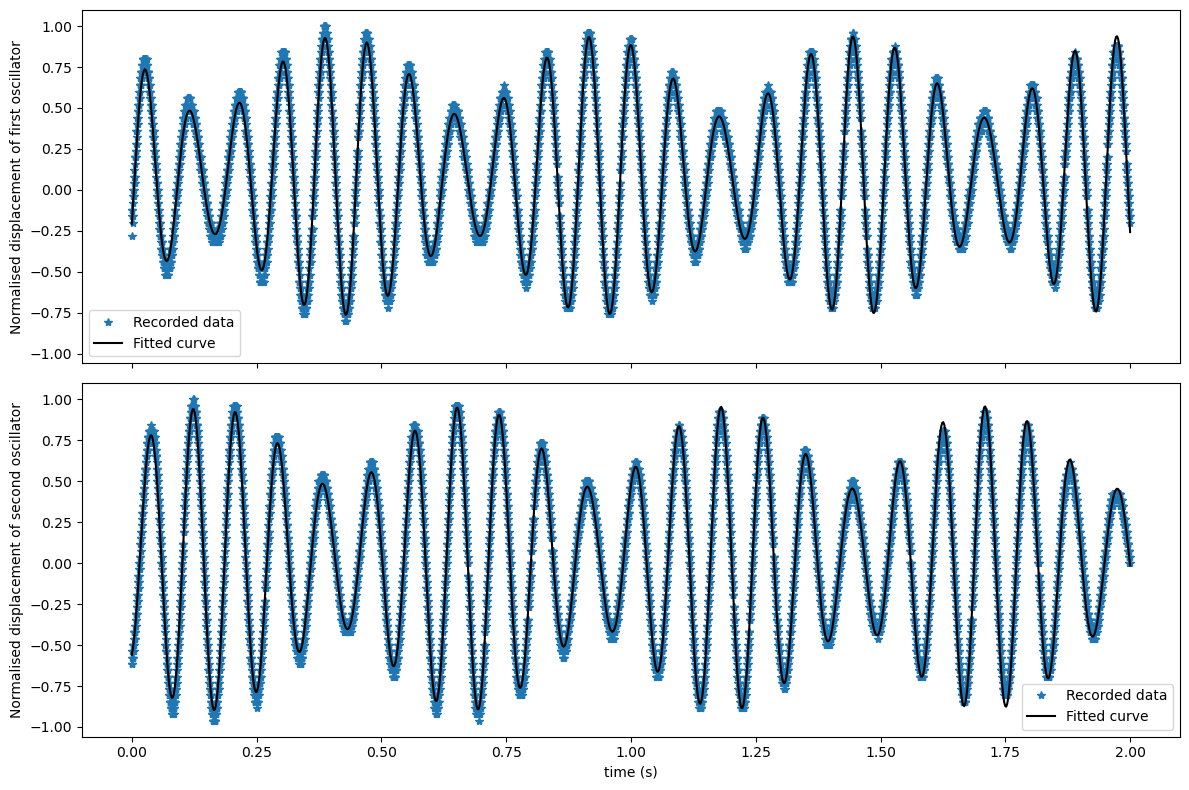

[[ 7.68580524e-07  2.36824478e-08  1.51761995e-08 -4.56947517e-07
  -2.48776918e-06 -3.48929193e-08 -9.42783208e-09]
 [ 2.36824478e-08  7.66811261e-07  2.24914950e-07  2.02813486e-08
  -1.15823362e-06 -1.32197830e-08 -7.19123808e-09]
 [ 1.51761995e-08  2.24914950e-07  6.28335239e-06  6.42283112e-07
  -3.85895795e-05 -4.44334319e-07  2.37039720e-08]
 [-4.56947517e-07  2.02813486e-08  6.42283112e-07  3.71393460e-05
   2.32215731e-04  3.28217440e-06  1.70175054e-08]
 [-2.48776918e-06 -1.15823362e-06 -3.85895795e-05  2.32215731e-04
   2.25269480e-03  3.09135290e-05 -1.95585048e-07]
 [-3.48929193e-08 -1.32197830e-08 -4.44334319e-07  3.28217440e-06
   3.09135290e-05  4.25921825e-07 -2.32283158e-09]
 [-9.42783208e-09 -7.19123808e-09  2.37039720e-08  1.70175054e-08
  -1.95585048e-07 -2.32283158e-09  3.78885897e-07]]


In [2]:
file1 = '/home/ws10/maitrey/p442-integrated-lab/IV. Coupled Oscillator/DKMM/DLL0001.CSV'
data = np.loadtxt(file1, delimiter=',')
t1 = data[:, 0] # first wave
y1 = data[:, 1] # first wave
t2 = data[:, 2] # second wave
y2 = data[:, 3] # second wave
sigma = np.ones(len(t1))*0.0004
guess = (-0.558248, -0.546048, 81.7136, 70.3442, 232.063, -1.39571, 0.315169)
# print(t1, y1)

popt1, pcov1 = curve_fit(oscillator, t1, y1, sigma=sigma, p0=(0.617704, 0.243294, 70.7494, 84.239, 319.04, -0.0768066, 0.0858925))
popt2, pcov2 = curve_fit(oscillator, t2, y2, sigma=sigma, p0=(0.617704, 0.243294, 70.7494, 84.239, 319.04, -0.0768066, 0.0858925))
print(popt1)
perr1 = np.sqrt(np.diag(pcov1))
perr2 = np.sqrt(np.diag(pcov2))
popt1_u = [ufloat(p, e) for p, e in zip(popt1, perr1)]
popt2_u = [ufloat(p, e) for p, e in zip(popt2, perr2)]
print(popt1_u)
A_1, B_1, omega_plus_1, omega_minus_1, phi_1, d_1, C_1 = popt1
A_2, B_2, omega_plus_2, omega_minus_2, phi_2, d_2, C_2 = popt2
A_1_u, B_1_u, omega_plus_1_u, omega_minus_1_u, phi_1_u, d_1_u, C_1_u = popt1_u
A_2_u, B_2_u, omega_plus_2_u, omega_minus_2_u, phi_2_u, d_2_u, C_2_u = popt2_u
# A_1 = abs(A_1)
# B_1 = abs(B_1)
# A_2 = abs(A_2)
# B_2 = abs(B_2)
DELTA_1_u = (omega_plus_1_u - omega_minus_1_u) * (abs(B_1_u) - abs(A_1_u)) / (abs(B_1_u) + abs(A_1_u)) # Detuning
OMEGA_1_u = (omega_plus_1_u - omega_minus_1_u) * (1 - ((abs(B_1_u) - abs(A_1_u)) / (abs(B_1_u) + abs(A_1_u)))**2)**0.5 # Rabi Frequency
omega_g_u = (omega_plus_1_u + omega_minus_1_u - DELTA_1_u) / 2 # Ground State Frequency
DELTA_2_u = (omega_plus_2_u - omega_minus_2_u) * (abs(B_2_u) - abs(A_2_u)) / (abs(B_2_u) + abs(A_2_u)) # Detuning
OMEGA_2_u = (omega_plus_2_u - omega_minus_2_u) * (1 - ((abs(B_2_u) - abs(A_2_u)) / (abs(B_2_u) + abs(A_2_u)))**2)**0.5 # Rabi Frequency
omega_e_u = (omega_plus_2_u + omega_minus_2_u - DELTA_2_u) / 2 # Excited State Frequency
DELTA_u = (DELTA_1_u + DELTA_2_u) / 2 # Average Detuning
OMEGA_u = (OMEGA_1_u + OMEGA_2_u) / 2 # Average Rabi Frequency
GEOMETRIC_PHASE_u = np.pi * (1 - (DELTA_u / (unumpy.sqrt(OMEGA_u**2 + DELTA_u**2)))) # Geometric Phase
print(DELTA_u, GEOMETRIC_PHASE_u/np.pi)
curve_t1 = np.linspace(0, 2, 1000)
curve_y1 = oscillator(curve_t1, A_1, B_1, omega_plus_1, omega_minus_1, phi_1, d_1, C_1)
curve_t2 = np.linspace(0, 2, 1000)
curve_y2 = oscillator(curve_t2, A_2, B_2, omega_plus_2, omega_minus_2, phi_2, d_2, C_2)
# print(curve_y2)
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 8), sharex=True, sharey=True)

ax1.plot(t1, y1, '*', label='Recorded data')
ax1.plot(curve_t1, curve_y1, 'black', label='Fitted curve')
# ax1.set_xlabel('time (s)')
ax1.set_ylabel('Normalised displacement of first oscillator')
ax1.legend()

ax2.plot(t2, y2, '*', label='Recorded data')
ax2.plot(curve_t2, curve_y2, 'black', label='Fitted curve')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Normalised displacement of second oscillator')
ax2.legend()


fig.align_ylabels()
plt.tight_layout()
# fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)
plt.savefig(f"{file1[-6:-4]}.png",dpi=600)
plt.show()
print(pcov1)

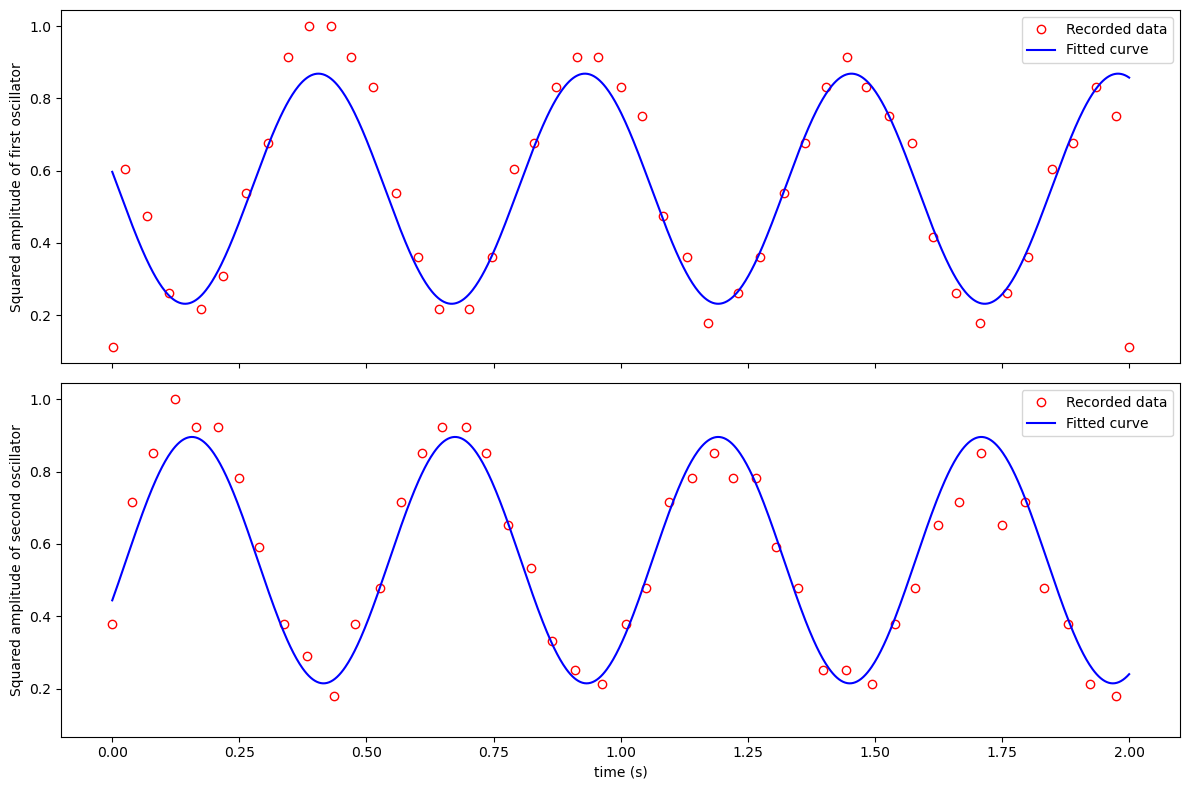

In [22]:
file1 = '/home/ws10/maitrey/p442-integrated-lab/IV. Coupled Oscillator/DKMM/DLL0001.CSV'
data = np.loadtxt(file1, delimiter=',')
t1 = data[:, 0] # first wave
y1 = data[:, 1]-0.1 # first wave
t2 = data[:, 2] # second wave
y2 = data[:, 3] # second wave

y1_square = y1**2
# Normalise the data
y1_square = y1_square / max(y1_square)
peaks1, _ = find_peaks(y1_square, height=0.1, distance=60)
y2_square = y2**2
# Normalise the data
y2_square = y2_square / max(y2_square)
peaks2, _ = find_peaks(y2_square, height=0.1, distance=60)


def sine_squared(x, A, omega, phi, C):
    return A * np.sin(omega * x + phi)**2 + C

t1_peaks = t1[peaks1]
y1_peaks = y1_square[peaks1]

t2_peaks = t2[peaks2]
y2_peaks = y2_square[peaks2]

# Write squared amplitude data to file as (x,y) pairs
np.savetxt('test_please.txt', np.transpose([t1_peaks, y1_peaks]), delimiter=',', fmt='%1.3f')

popt1, _ = curve_fit(sine_squared, t1_peaks, y1_peaks, p0=[-0.636255, 5.99238, 0.711885,0.868247])
popt2, _ = curve_fit(sine_squared, t2_peaks, y2_peaks, p0=[-0.636255, 5.99238, 0.711885,0.868247])

# Plot the fitted curves

# first intialise point for fitted function
curve_t1 = np.linspace(0, 2, 1000)
curve_y1 = sine_squared(curve_t1, *popt1)
curve_t2 = np.linspace(0, 2, 1000)
curve_y2 = sine_squared(curve_t2, *popt2)
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 8), sharex=True, sharey=True)

ax1.plot(t1_peaks, y1_peaks, 'o', label='Recorded data', markerfacecolor='none', markeredgecolor='red')
ax1.plot(curve_t1, curve_y1, 'blue', label='Fitted curve')
# ax1.set_xlabel('time (s)')
ax1.set_ylabel('Squared amplitude of first oscillator')
ax1.legend()

ax2.plot(t2_peaks, y2_peaks, 'o', label='Recorded data', markerfacecolor='none', markeredgecolor='red')
ax2.plot(curve_t2, curve_y2, 'blue', label='Fitted curve')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Squared amplitude of second oscillator')
ax2.legend()


fig.align_ylabels()
plt.tight_layout()
# fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)
plt.savefig(f"{file1[-6:-4]}_squared.png",dpi=600)
plt.show()





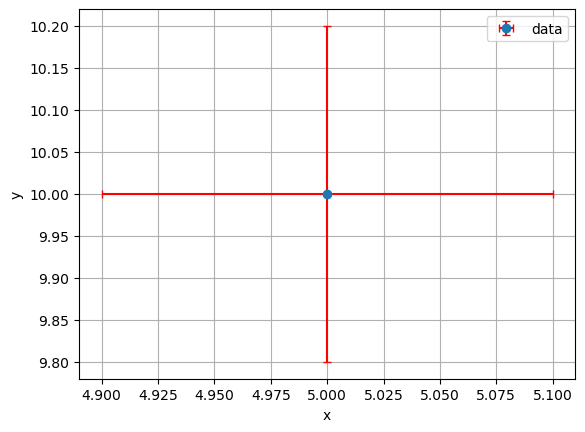

In [126]:
import matplotlib.pyplot as plt
from uncertainties import ufloat

# Define your ufloat objects
x = ufloat(5.0, 0.1)
y = ufloat(10.0, 0.2)

# Extract the nominal values and uncertainties
x_nom, x_err = x.nominal_value, x.std_dev
y_nom, y_err = y.nominal_value, y.std_dev

# Plot the data points with error bars
plt.errorbar(x_nom, y_nom, xerr=x_err, yerr=y_err, fmt='o', ecolor='red', capsize=3, label='data')

# Customize the plot
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

# Show the plot
plt.show()



In [134]:
from uncertainties import ufloat

# Define the least count of your instrument
least_count = 0.01

# Define the nominal value of your quantity
nominal_value = 5.23

# Calculate the standard deviation (absolute uncertainty) based on the desired number of significant figures
absolute_uncertainty = least_count / (2 ** (3 - 1))  # for 3 significant figures
# print(absolute_uncertainty)
# Create a ufloat object with the specified precision
x = ufloat(nominal_value, std_dev=absolute_uncertainty)

# Print the result
print(x/np.pi)


1.6648+/-0.0008


[ 2.63314179e-01 -4.11167970e-01  7.78773056e+01  6.66994064e+01
  3.27418087e+02 -3.90757294e-02  3.90185157e-01]


/tmp/ipykernel_468579/3920600857.py:19: RuntimeWarning: invalid value encountered in double_scalars
  OMEGA_1 = (omega_plus_1 - omega_minus_1) * (1 - ((B_1 - A_1) / (B_1 + A_1))**2)**0.5 # Rabi Frequency


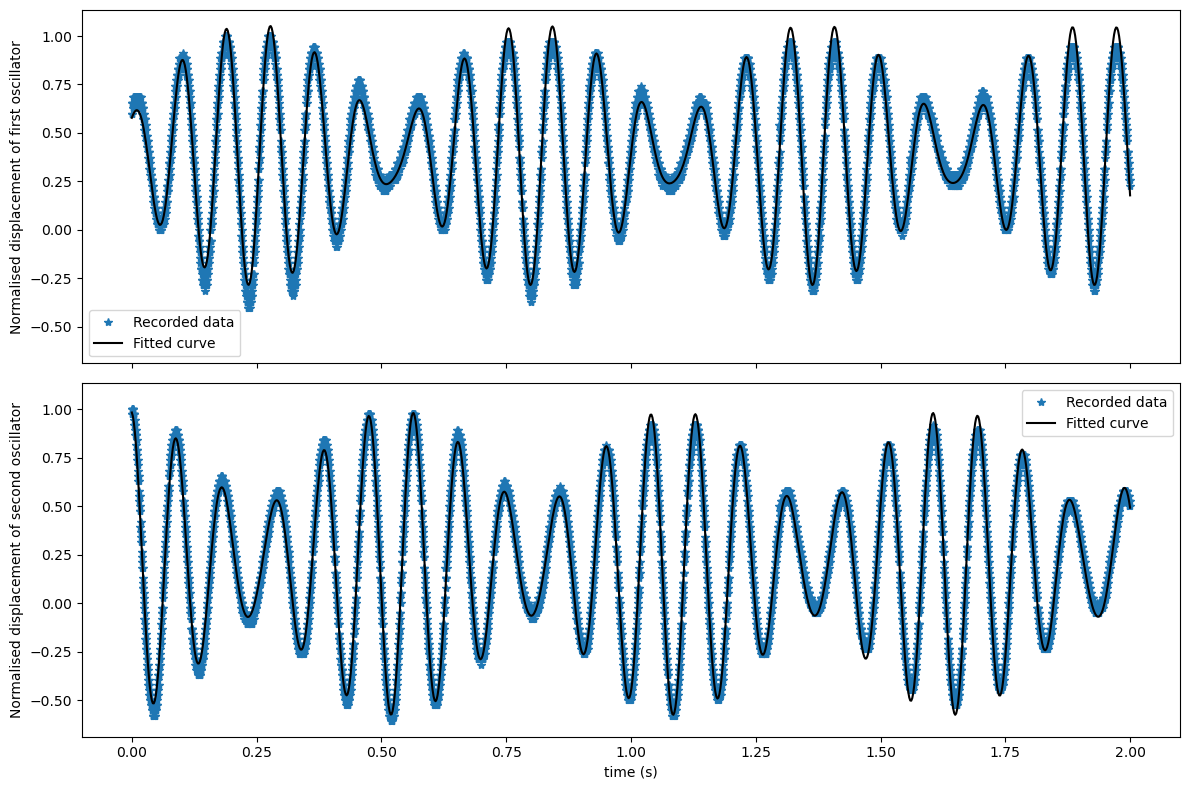

[[ 7.97765713e-07  4.01539739e-08 -2.81569313e-08 -4.93357146e-08
   1.11289112e-06  1.38507151e-08 -5.52171654e-09]
 [ 4.01539739e-08  7.94567790e-07 -1.66413672e-07  1.50841447e-09
  -2.41962384e-06 -3.60795431e-08  4.25961667e-09]
 [-2.81569313e-08 -1.66413672e-07  3.42573797e-05 -3.21311207e-06
   2.31182794e-04  3.42412159e-06  9.87879096e-08]
 [-4.93357146e-08  1.50841447e-09 -3.21311207e-06  1.42386443e-05
  -1.19231066e-04 -1.56685783e-06 -4.96871625e-08]
 [ 1.11289112e-06 -2.41962384e-06  2.31182794e-04 -1.19231066e-04
   2.90601425e-03  4.12457579e-05  1.05459364e-06]
 [ 1.38507151e-08 -3.60795431e-08  3.42412159e-06 -1.56685783e-06
   4.12457579e-05  5.88030273e-07  1.48584847e-08]
 [-5.52171654e-09  4.25961667e-09  9.87879096e-08 -4.96871625e-08
   1.05459364e-06  1.48584847e-08  3.93770340e-07]]


In [100]:
file1 = '/home/ws10/maitrey/p442-integrated-lab/IV. Coupled Oscillator/DKMM/DLL0002.CSV'
data = np.loadtxt(file1, delimiter=',')
t1 = data[:, 0] # first wave
y1 = data[:, 1] # first wave
t2 = data[:, 2] # second wave
y2 = data[:, 3] # second wave
sigma = np.ones(len(t1))*0.0004
guess = (-0.558248, -0.546048, 81.7136, 70.3442, 232.063, -1.39571, 0.315169)
# print(t1, y1)
popt1, pcov1 = curve_fit(oscillator, t1, y1, sigma=sigma, p0=(0.282505, -0.417384, 77.3538, 66.8972, 326.274, -0.0555561, 0.381359))
popt2, pcov2 = curve_fit(oscillator, t2, y2, sigma=sigma, p0=(0.282505, -0.417384, 77.3538, 66.8972, 326.274, -0.0555561, 0.381359))
print(popt1)
A_1, B_1, omega_plus_1, omega_minus_1, phi_1, d_1, C_1 = popt1
A_2, B_2, omega_plus_2, omega_minus_2, phi_2, d_2, C_2 = popt2
# A_1 = abs(A_1)
# B_1 = abs(B_1)
# A_2 = abs(A_2)
# B_2 = abs(B_2)
DELTA_1 = (omega_plus_1 - omega_minus_1) * (B_1 - A_1) / (B_1 + A_1) # Detuning
OMEGA_1 = (omega_plus_1 - omega_minus_1) * (1 - ((B_1 - A_1) / (B_1 + A_1))**2)**0.5 # Rabi Frequency
omega_g = (omega_plus_1 + omega_minus_1 - DELTA_1) / 2 # Ground State Frequency
DELTA_2 = (omega_plus_2 - omega_minus_2) * (B_2 - A_2) / (B_2 + A_2) # Detuning
OMEGA_2 = (omega_plus_2 - omega_minus_2) * (1 - ((B_2 - A_2) / (B_2 + A_2))**2)**0.5 # Rabi Frequency
omega_e = (omega_plus_2 + omega_minus_2 - DELTA_2) / 2 # Excited State Frequency
curve_t1 = np.linspace(0, 2, 1000)
curve_y1 = oscillator(curve_t1, A_1, B_1, omega_plus_1, omega_minus_1, phi_1, d_1, C_1)
curve_t2 = np.linspace(0, 2, 1000)
curve_y2 = oscillator(curve_t2, A_2, B_2, omega_plus_2, omega_minus_2, phi_2, d_2, C_2)
# print(curve_y2)
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 8), sharex=True, sharey=True)

ax1.plot(t1, y1, '*', label='Recorded data')
ax1.plot(curve_t1, curve_y1, 'black', label='Fitted curve')
# ax1.set_xlabel('time (s)')
ax1.set_ylabel('Normalised displacement of first oscillator')
ax1.legend()

ax2.plot(t2, y2, '*', label='Recorded data')
ax2.plot(curve_t2, curve_y2, 'black', label='Fitted curve')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Normalised displacement of second oscillator')
ax2.legend()


fig.align_ylabels()
plt.tight_layout()
# fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)
plt.savefig(f"{file1[-6:-4]}.png",dpi=600)
plt.show()
print(pcov1)

[ 2.52044289e-01 -5.26084486e-01  8.18012132e+01  7.00337856e+01
  3.29805411e+02 -7.27978169e-03  3.29848835e-01]


/tmp/ipykernel_468579/1168091779.py:19: RuntimeWarning: invalid value encountered in double_scalars
  OMEGA_1 = (omega_plus_1 - omega_minus_1) * (1 - ((B_1 - A_1) / (B_1 + A_1))**2)**0.5 # Rabi Frequency


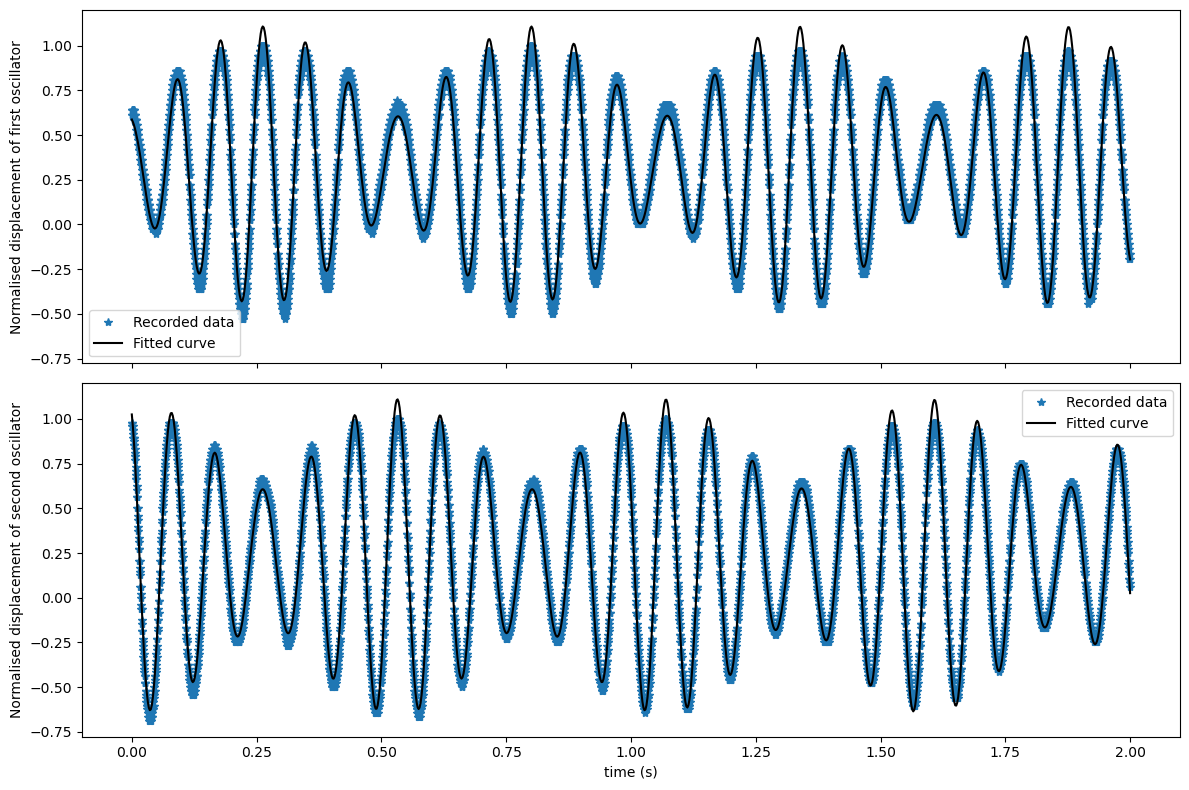

[[ 1.15340869e-06  5.61150655e-08 -3.36393010e-09 -3.24838539e-07
   2.53643630e-06  3.04743982e-08  2.22718228e-09]
 [ 5.61150655e-08  1.16137643e-06 -6.57959829e-07  1.56170380e-08
  -5.20833761e-06 -7.42484063e-08  1.28468589e-09]
 [-3.36393011e-09 -6.57959829e-07  5.53389141e-05 -2.80291891e-06
   3.39613732e-04  4.82603228e-06  1.29886297e-07]
 [-3.24838539e-07  1.56170380e-08 -2.80291891e-06  1.24517196e-05
  -9.64744330e-05 -1.19924425e-06 -1.87024945e-08]
 [ 2.53643630e-06 -5.20833761e-06  3.39613732e-04 -9.64744330e-05
   3.46362422e-03  4.77330972e-05  1.07633405e-06]
 [ 3.04743982e-08 -7.42484063e-08  4.82603228e-06 -1.19924425e-06
   4.77330972e-05  6.60361188e-07  1.47953207e-08]
 [ 2.22718228e-09  1.28468589e-09  1.29886297e-07 -1.87024945e-08
   1.07633405e-06  1.47953207e-08  5.71094060e-07]]


In [101]:
file1 = '/home/ws10/maitrey/p442-integrated-lab/IV. Coupled Oscillator/DKMM/DLL0003.CSV'
data = np.loadtxt(file1, delimiter=',')
t1 = data[:, 0] # first wave
y1 = data[:, 1] # first wave
t2 = data[:, 2] # second wave
y2 = data[:, 3] # second wave
sigma = np.ones(len(t1))*0.0004
guess = (-0.558248, -0.546048, 81.7136, 70.3442, 232.063, -1.39571, 0.315169)
# print(t1, y1)
popt1, pcov1 = curve_fit(oscillator, t1, y1, sigma=sigma, p0=(0.250184, -0.546048 , 81.7136, 70.3442, 329.251, -0.0141077, 0.315169))
popt2, pcov2 = curve_fit(oscillator, t2, y2, sigma=sigma, p0=(0.250184, -0.546048 , 81.7136, 70.3442, 329.251, -0.0141077, 0.315169))
print(popt1)
A_1, B_1, omega_plus_1, omega_minus_1, phi_1, d_1, C_1 = popt1
A_2, B_2, omega_plus_2, omega_minus_2, phi_2, d_2, C_2 = popt2
# A_1 = abs(A_1)
# B_1 = abs(B_1)
# A_2 = abs(A_2)
# B_2 = abs(B_2)
DELTA_1 = (omega_plus_1 - omega_minus_1) * (B_1 - A_1) / (B_1 + A_1) # Detuning
OMEGA_1 = (omega_plus_1 - omega_minus_1) * (1 - ((B_1 - A_1) / (B_1 + A_1))**2)**0.5 # Rabi Frequency
omega_g = (omega_plus_1 + omega_minus_1 - DELTA_1) / 2 # Ground State Frequency
# DELTA_2 = (omega_plus_2 - omega_minus_2) * (B_2 - A_2) / (B_2 + A_2) # Detuning
# OMEGA_2 = (omega_plus_2 - omega_minus_2) * (1 - ((B_2 - A_2) / (B_2 + A_2))**2)**0.5 # Rabi Frequency
# omega_e = (omega_plus_2 + omega_minus_2 - DELTA_2) / 2 # Excited State Frequency
curve_t1 = np.linspace(0, 2, 1000)
curve_y1 = oscillator(curve_t1, A_1, B_1, omega_plus_1, omega_minus_1, phi_1, d_1, C_1)
curve_t2 = np.linspace(0, 2, 1000)
curve_y2 = oscillator(curve_t2, A_2, B_2, omega_plus_2, omega_minus_2, phi_2, d_2, C_2)
# print(curve_y2)
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 8), sharex=True, sharey=True)

ax1.plot(t1, y1, '*', label='Recorded data')
ax1.plot(curve_t1, curve_y1, 'black', label='Fitted curve')
# ax1.set_xlabel('time (s)')
ax1.set_ylabel('Normalised displacement of first oscillator')
ax1.legend()

ax2.plot(t2, y2, '*', label='Recorded data')
ax2.plot(curve_t2, curve_y2, 'black', label='Fitted curve')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Normalised displacement of second oscillator')
ax2.legend()


fig.align_ylabels()
plt.tight_layout()
# fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)
plt.savefig(f"{file1[-6:-4]}.png",dpi=600)
plt.show()
print(pcov1)

[-0.5446235  -0.22993728 68.56355841 80.1232401  16.78497677  0.25370543
  0.31092937]


/tmp/ipykernel_468579/931313444.py:22: RuntimeWarning: invalid value encountered in double_scalars
  OMEGA_2 = (omega_plus_2 - omega_minus_2) * (1 - ((B_2 - A_2) / (B_2 + A_2))**2)**0.5 # Rabi Frequency


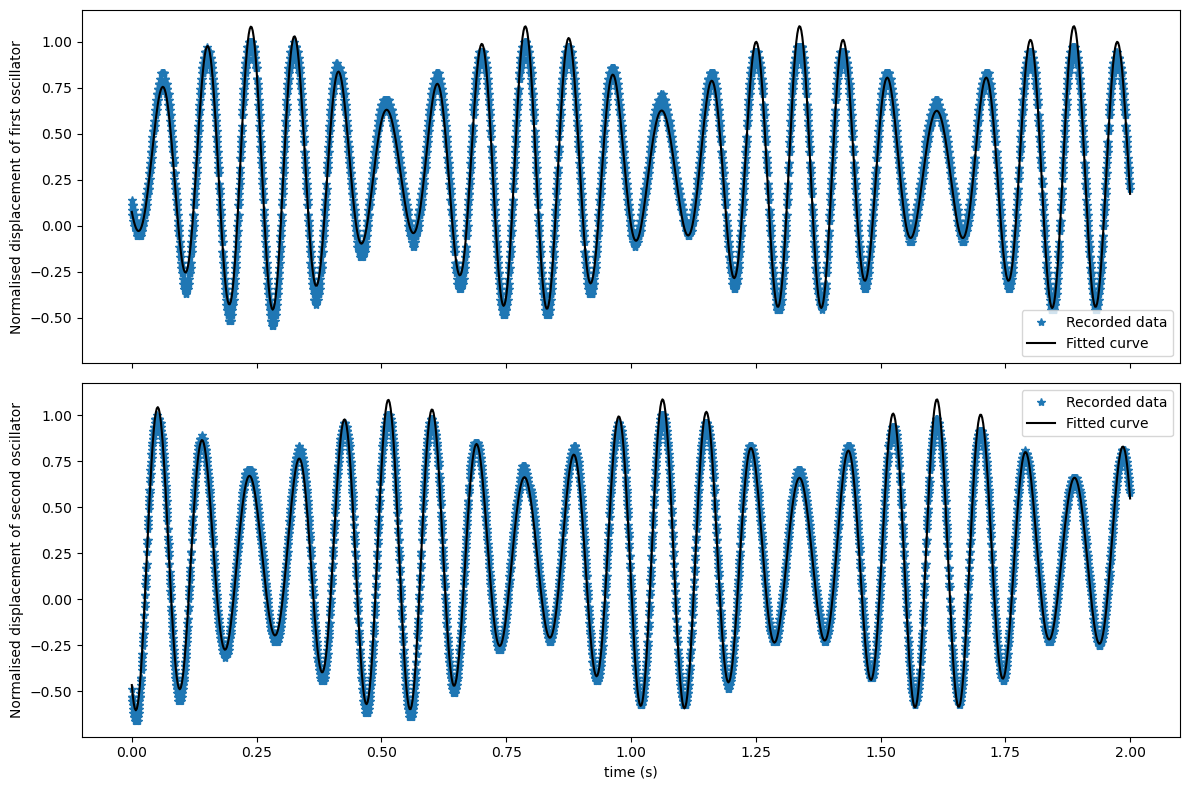

[[ 9.00545419e-07 -4.10304764e-08  1.52640573e-09 -4.76009451e-07
  -3.35457132e-06 -4.88925268e-08  2.99374577e-09]
 [-4.10304764e-08  9.03288780e-07  1.67212087e-07  3.60112138e-08
  -1.24577360e-06 -1.50672343e-08  5.06416449e-09]
 [ 1.52640573e-09  1.67212087e-07  9.47797298e-06 -3.38577305e-06
  -5.88164740e-05 -7.55208107e-07  2.33353251e-08]
 [-4.76009451e-07  3.60112138e-08 -3.38577305e-06  5.25465660e-05
   2.43867033e-04  3.53210660e-06 -5.26483180e-09]
 [-3.35457132e-06 -1.24577360e-06 -5.88164740e-05  2.43867033e-04
   2.11305475e-03  2.98895686e-05 -5.03411352e-07]
 [-4.88925268e-08 -1.50672343e-08 -7.55208107e-07  3.53210660e-06
   2.98895686e-05  4.24148570e-07 -6.89532216e-09]
 [ 2.99374577e-09  5.06416449e-09  2.33353251e-08 -5.26483180e-09
  -5.03411352e-07 -6.89532216e-09  4.48219763e-07]]


In [102]:
file1 = '/home/ws10/maitrey/p442-integrated-lab/IV. Coupled Oscillator/DKMM/DLL0004.CSV'
data = np.loadtxt(file1, delimiter=',')
t1 = data[:, 0] # first wave
y1 = data[:, 1] # first wave
t2 = data[:, 2] # second wave
y2 = data[:, 3] # second wave
sigma = np.ones(len(t1))*0.0004
guess = (-0.558248, -0.546048, 81.7136, 70.3442, 232.063, -1.39571, 0.315169) 
# print(t1, y1)
popt1, pcov1 = curve_fit(oscillator, t1, y1, sigma=sigma, p0=(-0.561579, -0.236223, 68.788, 79.9736, 16.9465, 0.255952, 0.298113))
popt2, pcov2 = curve_fit(oscillator, t2, y2, sigma=sigma, p0=(-0.561579, -0.236223, 68.788, 79.9736, 16.9465, 0.255952, 0.298113))
print(popt1)
A_1, B_1, omega_plus_1, omega_minus_1, phi_1, d_1, C_1 = popt1
A_2, B_2, omega_plus_2, omega_minus_2, phi_2, d_2, C_2 = popt2
# A_1 = abs(A_1)
# B_1 = abs(B_1)
# A_2 = abs(A_2)
# B_2 = abs(B_2)
DELTA_1 = (omega_plus_1 - omega_minus_1) * (B_1 - A_1) / (B_1 + A_1) # Detuning
OMEGA_1 = (omega_plus_1 - omega_minus_1) * (1 - ((B_1 - A_1) / (B_1 + A_1))**2)**0.5 # Rabi Frequency
omega_g = (omega_plus_1 + omega_minus_1 - DELTA_1) / 2 # Ground State Frequency
DELTA_2 = (omega_plus_2 - omega_minus_2) * (B_2 - A_2) / (B_2 + A_2) # Detuning
OMEGA_2 = (omega_plus_2 - omega_minus_2) * (1 - ((B_2 - A_2) / (B_2 + A_2))**2)**0.5 # Rabi Frequency
omega_e = (omega_plus_2 + omega_minus_2 - DELTA_2) / 2 # Excited State Frequency
curve_t1 = np.linspace(0, 2, 1000)
curve_y1 = oscillator(curve_t1, A_1, B_1, omega_plus_1, omega_minus_1, phi_1, d_1, C_1)
curve_t2 = np.linspace(0, 2, 1000)
curve_y2 = oscillator(curve_t2, A_2, B_2, omega_plus_2, omega_minus_2, phi_2, d_2, C_2)
# print(curve_y2)
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 8), sharex=True, sharey=True)

ax1.plot(t1, y1, '*', label='Recorded data')
ax1.plot(curve_t1, curve_y1, 'black', label='Fitted curve')
# ax1.set_xlabel('time (s)')
ax1.set_ylabel('Normalised displacement of first oscillator')
ax1.legend()

ax2.plot(t2, y2, '*', label='Recorded data')
ax2.plot(curve_t2, curve_y2, 'black', label='Fitted curve')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Normalised displacement of second oscillator')
ax2.legend()


fig.align_ylabels()
plt.tight_layout()
# fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)
plt.savefig(f"{file1[-6:-4]}.png",dpi=600)
plt.show()
print(pcov1)

[0.00087867 0.00087739 0.00488517 0.00285609 0.07086538 0.0009571
 0.00062023]
[ 3.12948397e-01  5.37082893e-01  8.33373145e+01  7.07620078e+01
  2.52681055e+02 -1.09545631e+00  1.10559877e-01]


/tmp/ipykernel_468579/242263731.py:26: RuntimeWarning: invalid value encountered in double_scalars
  OMEGA_2 = (omega_plus_2 - omega_minus_2) * (1 - ((B_2 - A_2) / (B_2 + A_2))**2)**0.5 # Rabi Frequency


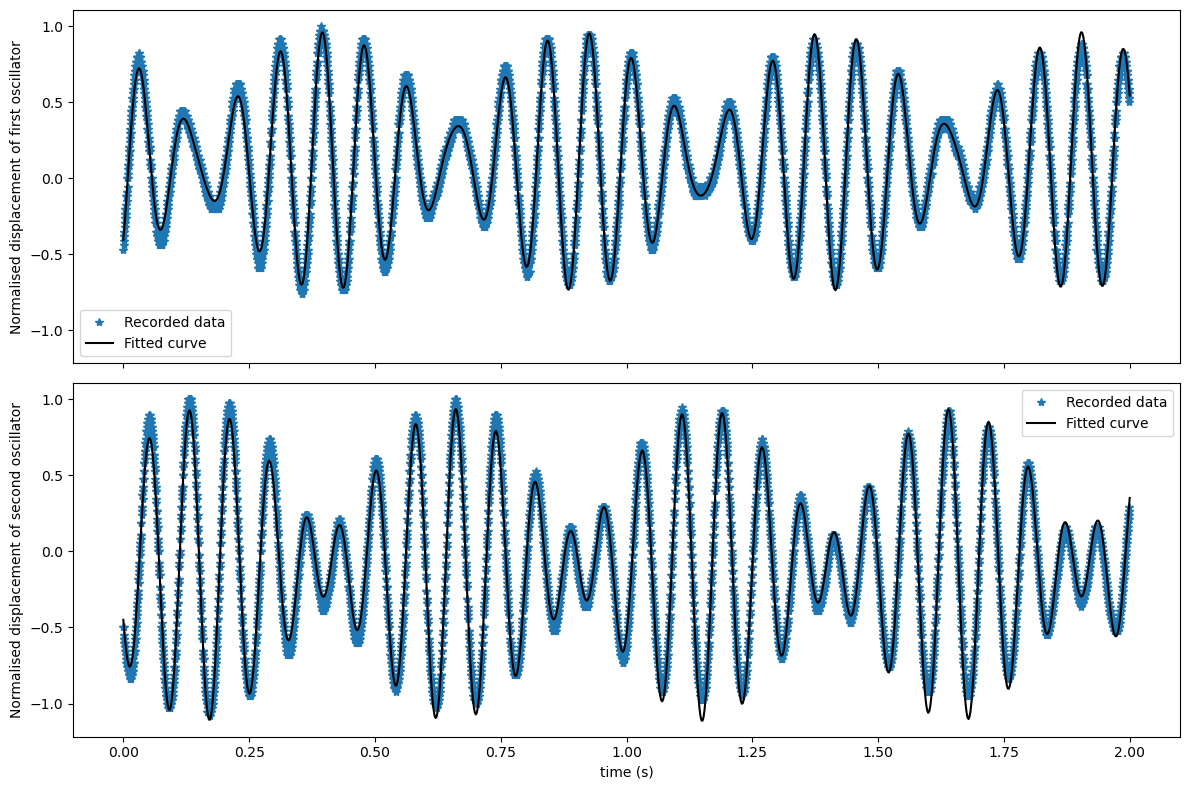

[[ 7.72061638e-07 -4.30308222e-10  4.01945930e-08  1.32384080e-07
  -1.27563102e-06 -1.41059541e-08 -9.17472989e-09]
 [-4.30308222e-10  7.69804521e-07 -1.85849982e-07 -2.04772161e-08
  -1.88537677e-06 -2.73725884e-08 -4.27707126e-09]
 [ 4.01945930e-08 -1.85849982e-07  2.38649074e-05 -2.17731003e-07
   2.77959040e-04  3.93517369e-06  1.58544834e-08]
 [ 1.32384080e-07 -2.04772161e-08 -2.17731003e-07  8.15723359e-06
  -1.10099978e-04 -1.31508264e-06  1.03754003e-10]
 [-1.27563102e-06 -1.88537677e-06  2.77959040e-04 -1.10099978e-04
   5.02190143e-03  6.76239585e-05  5.14147015e-08]
 [-1.41059541e-08 -2.73725884e-08  3.93517369e-06 -1.31508264e-06
   6.76239585e-05  9.16034332e-07  1.00255562e-09]
 [-9.17472989e-09 -4.27707126e-09  1.58544834e-08  1.03754003e-10
   5.14147015e-08  1.00255562e-09  3.84689900e-07]]


In [106]:
file1 = '/home/ws10/maitrey/p442-integrated-lab/IV. Coupled Oscillator/DKMM/DLL0005.CSV'
data = np.loadtxt(file1, delimiter=',')
t1 = data[:, 0] # first wave
y1 = data[:, 1] # first wave
t2 = data[:, 2] # second wave
y2 = data[:, 3] # second wave
sigma = np.ones(len(t1))*0.0004
guess = (-0.558248, -0.546048, 81.7136, 70.3442, 232.063, -1.39571, 0.315169)
# print(t1, y1)
popt1, pcov1 = curve_fit(oscillator, t1, y1, sigma=sigma, p0 = guess)
popt2, pcov2 = curve_fit(oscillator, t2, y2, sigma=sigma, p0 = guess)

print(popt1)
A_1, B_1, omega_plus_1, omega_minus_1, phi_1, d_1, C_1 = popt1
A_2, B_2, omega_plus_2, omega_minus_2, phi_2, d_2, C_2 = popt2
# A_1 = abs(A_1)
# B_1 = abs(B_1)
# A_2 = abs(A_2)
# B_2 = abs(B_2)
DELTA_1 = (omega_plus_1 - omega_minus_1) * (B_1 - A_1) / (B_1 + A_1) # Detuning
OMEGA_1 = (omega_plus_1 - omega_minus_1) * (1 - ((B_1 - A_1) / (B_1 + A_1))**2)**0.5 # Rabi Frequency
omega_g = (omega_plus_1 + omega_minus_1 - DELTA_1) / 2 # Ground State Frequency
DELTA_2 = (omega_plus_2 - omega_minus_2) * (B_2 - A_2) / (B_2 + A_2) # Detuning
OMEGA_2 = (omega_plus_2 - omega_minus_2) * (1 - ((B_2 - A_2) / (B_2 + A_2))**2)**0.5 # Rabi Frequency
omega_e = (omega_plus_2 + omega_minus_2 - DELTA_2) / 2 # Excited State Frequency
curve_t1 = np.linspace(0, 2, 1000)
curve_y1 = oscillator(curve_t1, A_1, B_1, omega_plus_1, omega_minus_1, phi_1, d_1, C_1)
curve_t2 = np.linspace(0, 2, 1000)
curve_y2 = oscillator(curve_t2, A_2, B_2, omega_plus_2, omega_minus_2, phi_2, d_2, C_2)
# print(curve_y2)
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 8), sharex=True, sharey=True)

ax1.plot(t1, y1, '*', label='Recorded data')
ax1.plot(curve_t1, curve_y1, 'black', label='Fitted curve')
# ax1.set_xlabel('time (s)')
ax1.set_ylabel('Normalised displacement of first oscillator')
ax1.legend()

ax2.plot(t2, y2, '*', label='Recorded data')
ax2.plot(curve_t2, curve_y2, 'black', label='Fitted curve')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Normalised displacement of second oscillator')
ax2.legend()


fig.align_ylabels()
plt.tight_layout()
# fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)
# plt.savefig(f"{file1[-6:-4]}.png",dpi=600)
plt.show()
print(pcov1)

In [105]:



filename = '/home/ws10/maitrey/p442-integrated-lab/IV. Coupled Oscillator/DKMM/ALL0050.CSV'
data = np.genfromtxt(filename, skip_header=300, delimiter=',')

t1 = data[:, 0] # first wave
t1 = t1 - t1[0]
y1 = data[:, 1] # first wave
y1 = y1 / np.max(y1)
t2 = data[:, 2] # second wave
t2 = t2 - t2[0]
y2 = data[:, 3] # second wave
y2 = y2 / np.max(y2)


print(t1)

[0.0000e+00 4.0000e-04 8.0000e-04 ... 1.8860e+00 1.8864e+00 1.8868e+00]
